# Plane Predictor

**Background:** Airline delays and cancellations pose significant challenges to
passengers, airlines, and airport operations. Predicting and understanding the 
factors that contribute to these delays can help mitigate their impact, improve 
passenger satisfaction, and optimize operational efficiency.

**Objective:** Predict if a flight will be delayed or not based on various 
factors, such as weather and airline.


Information about the dataset used in this project is in 
`dataset_documentation.txt`. Target variable is `DEP_DEL15`, which is 1 if the 
flight departed more than 15 minutes after their planned orginal depature time,
and 0 otherwise.

Since the training dataset has 4 million flights of data, I randomly sampled 500,000 
flights and stored it in `train.csv`. If you would like to see the full datasets,
check out this [link](https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations/data).

In this notebook, I use ...

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
'''
    Code used to randomly sample the training and testing dataset and reduce the
    size, improving run time of this whole program

# Training:
file_path = 'train.csv'
df = pd.read_csv(file_path)
df_sampled = df.sample(n=350000, random_state=1)
df_sampled.to_csv(file_path, index=False)

# Testing:
file_path = 'test.csv'
df = pd.read_csv(file_path)
df_sampled = df.sample(n=100000, random_state=1)
df_sampled.to_csv(file_path, index=False)
'''

In [294]:
# Load and View Data
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## Exploratory Data Analysis

**Goal:** Analyze and summarize the main characteristics of this dataset

In [295]:
# Allow all columns to be displayed
pd.set_option('display.max_columns',None)

In [296]:
# Check the Shape of the Dataset
print(f"Dimensions of Dataset: {df.shape}")

Dimensions of Dataset: (500000, 30)


In [297]:
# View some of the Dataset
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
0,12,4,0,0900-0959,2,2,43,50,SkyWest Airlines Inc.,15165,70473,1304,1690031,3472966,0.000034,0.000099,14,Houston Intercontinental,29.983,-95.340,Eppley Airfield,0.28,0.0,0.0,85.0,5.37,0.202513,0.164248,0.181618,0.155223
1,3,3,0,1200-1259,1,4,59,76,Endeavor Air Inc.,33799,22191,3137,4365661,1212846,0.000000,0.000094,11,Atlanta Municipal,33.641,-84.427,Gulfport-Biloxi International,0.00,0.0,0.0,63.0,5.59,0.155571,0.187867,0.151269,0.179698
2,2,1,0,1400-1459,2,1,23,143,Southwest Airlines Co.,10780,94922,3110,1823051,13382999,0.000062,0.000099,16,Orlando International,28.432,-81.325,NONE,0.00,0.0,0.0,70.0,5.82,0.258887,0.187867,0.229539,0.259786
3,4,2,0,0900-0959,1,2,39,50,American Eagle Airlines Inc.,26142,25138,5184,3103410,1204766,0.000348,0.000107,14,Chicago O'Hare International,41.978,-87.906,McGhee Tyson,0.00,0.0,0.0,73.0,10.29,0.148148,0.188167,0.138603,0.135374
4,10,5,1,2100-2159,4,3,16,200,JetBlue Airways,11393,24795,1631,1823051,3190369,0.000160,0.000127,1,Orlando International,28.432,-81.325,John F. Kennedy International,0.00,0.0,0.0,89.0,9.40,0.198369,0.127255,0.193713,0.223513


In [298]:
# Check the Datatypes and Non-Null Counts of each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MONTH                          500000 non-null  int64  
 1   DAY_OF_WEEK                    500000 non-null  int64  
 2   DEP_DEL15                      500000 non-null  int64  
 3   DEP_TIME_BLK                   500000 non-null  object 
 4   DISTANCE_GROUP                 500000 non-null  int64  
 5   SEGMENT_NUMBER                 500000 non-null  int64  
 6   CONCURRENT_FLIGHTS             500000 non-null  int64  
 7   NUMBER_OF_SEATS                500000 non-null  int64  
 8   CARRIER_NAME                   500000 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          500000 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          500000 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  500000 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT      

Takeaways from Above
- There are no missing values in this dataset, as each feature has 500k non-null
values.
- Departing Time Block (`DEP_TIME_BLK`) is a string with various information. On
it's own, it represents the time period a flight can depart. However, it can 
rather be broken down into 3 int64 columns that can be more useful to the model:
  - `START_DEPART`: Starting time of the eligible departure time period
  - `DURATION_BLOCK`: Duration of the eligible departure time period
  - `END_DEPART`: Ending time of the eligible departure time period
- Datatypes of the remaining features are the expected types.
- There are a lot of features, some of which could be redundant.
  - Example: (`AVG_MONTHLY_PASS_AIRPORT` and `AIRPORT_FLIGHTS_MONTH`)

### Analysis of Target Variable
The goal of this section is to analyze the distribution of the target variable, 
`DEP_DEL15` by visualizing the percentage of delayed through a pie chart. This
variable is `1` if the flight is delayed for more than 15 minutes or `0` otherwise.
This will allow me to notice any imbalance in the data and fix it in data 
preprocessing.

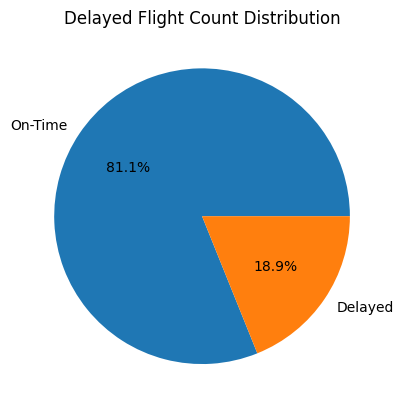

In [299]:
# Visualize percentages of target variable, which is DEP_DEL15
class_labels = {0: 'On-Time', 1: 'Delayed'}
counts = df['DEP_DEL15'].value_counts()
plt.pie(counts, labels=counts.index.map(class_labels), autopct='%1.1f%%')
plt.title('Delayed Flight Count Distribution')
plt.show()

Takeaways from Above
- This percentage indicates that this dataset is a good representation of 
overall flights, as the historical delay percentage in the U.S. is around 20% 
according to this report from [AFAR](https://www.afar.com/magazine/how-many-flights-get-canceled-on-average-each-day#:~:text=%E2%80%9CIt%20is%20'normal'%20to,roughly%20250%20canceled%20flights%20nationwide.).
- However, there is a major inbalance towards on-time flights compared to those
that are delayed that could affect the model.
- In this project, predicting an on-time flight to be delayed is better than 
predicting a delayed flight will be able to depart on-time.

### Analysis of Features

The goal of this section is to analyze the distribution of all of the features
and see how delay percentage changes based off of that feature.

This section is later broken down into 2 sub-sections, `Categorical` and 
`Numerical`, where we analyze the 2 types of variables.

We'll start off by looking at correlations between the features through a heat
map and a top correlation list to see which features are highly correlated 
together. This will be useful later when we dimension reduction and open the door
for algorithms that have problems with feature that have high-colinearity.

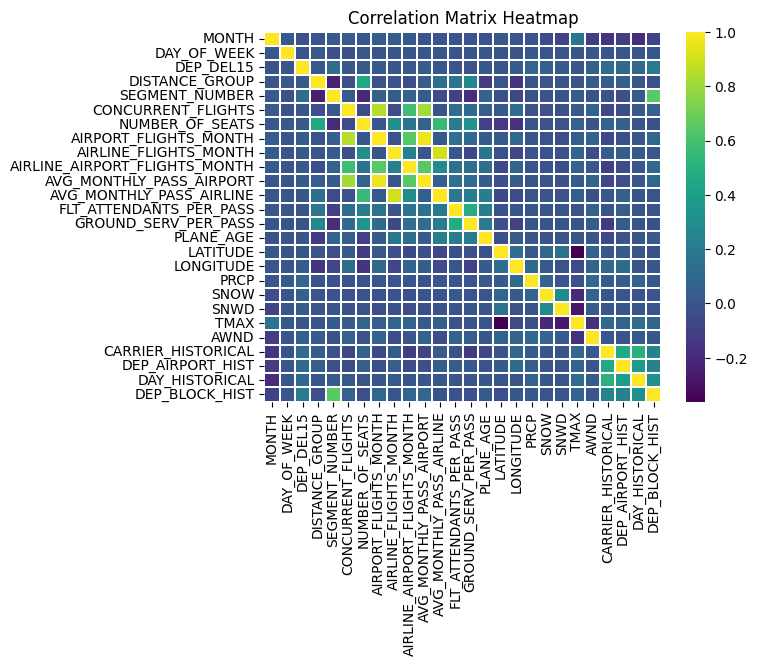

In [300]:
# Create the Heatmap of Correlations
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=False, cmap='viridis', fmt='.1%',
            linewidths=0.01,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.index)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [301]:
# Retrieve DataFrame of Top Correlations with a Threshold of 0.9
corr_unstacked = corr_matrix.unstack()
corr_unstacked = corr_unstacked[corr_unstacked != 1]
sorted_corr = corr_unstacked.reindex(corr_unstacked.abs().sort_values(\
    ascending=False).index)
sorted_corr[sorted_corr.abs() >= 0.9]

AVG_MONTHLY_PASS_AIRPORT  AIRPORT_FLIGHTS_MONTH       0.968029
AIRPORT_FLIGHTS_MONTH     AVG_MONTHLY_PASS_AIRPORT    0.968029
AIRLINE_FLIGHTS_MONTH     AVG_MONTHLY_PASS_AIRLINE    0.902767
AVG_MONTHLY_PASS_AIRLINE  AIRLINE_FLIGHTS_MONTH       0.902767
dtype: float64

Inferences from Above
- Average passengers (`AVG_MONTHLY_PASS_AIRPORT`) and average flights 
(`AIRPORT_FLIGHTS_MONTH`) in the departing airport per month are highly 
correlated. 
  - This logically makes sense, as the more flights the airport has, the more 
passenegers it serves.
- Same applies to airlines: `AVG_MONTHLY_PASS_AIRLINE` and 
`AIRLINE_FLIGHTS_MONTH`

#### Analysis of Categorical Variables

This section analyzes the distribution of all of the categorical features. I'm 
considering month, day of the week, distance group, and segment number as 
categorical since they're discrete values rather than continous.

I'll start off by examining how 
the feature is distributed and how flight delay perecentage change based off of
changes in the feature through bar charts. This will help me detect 
imbalances in the dataset and see any patterns with the target variable.

In [302]:
# Helper Function to Add Labels to Bars in Bar Charts
def add_labels(axes, num):
    for p in axes[num].patches:
        height = p.get_height()
        if height < 1.0:
            height = round(height, 2)
        else:
            height = int(height)
        axes[num].annotate(height, (p.get_x() + p.get_width() / 2., p.get_height()/3), 
            ha = 'center', 
            va = 'center', 
            xytext = (0, 9), textcoords = 'offset points'
        )

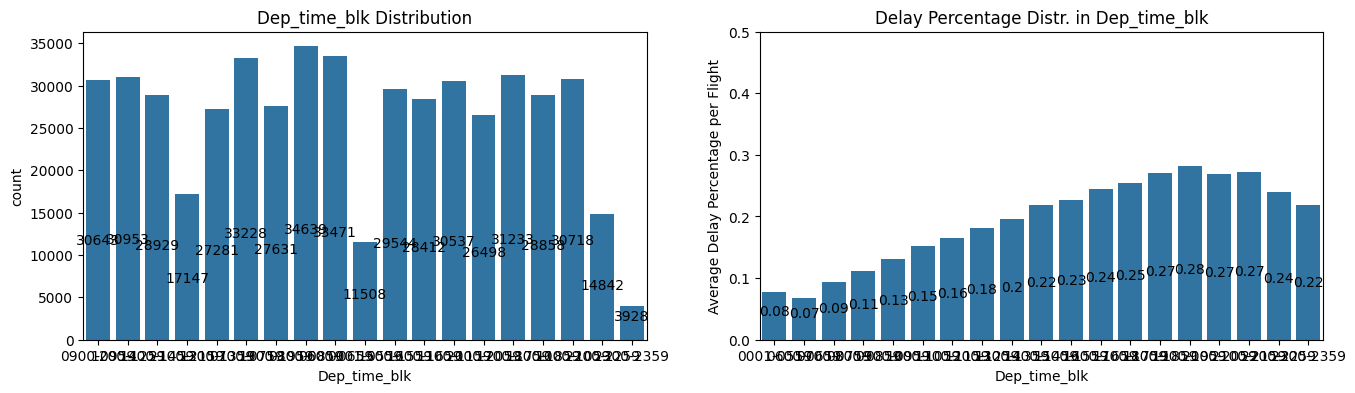

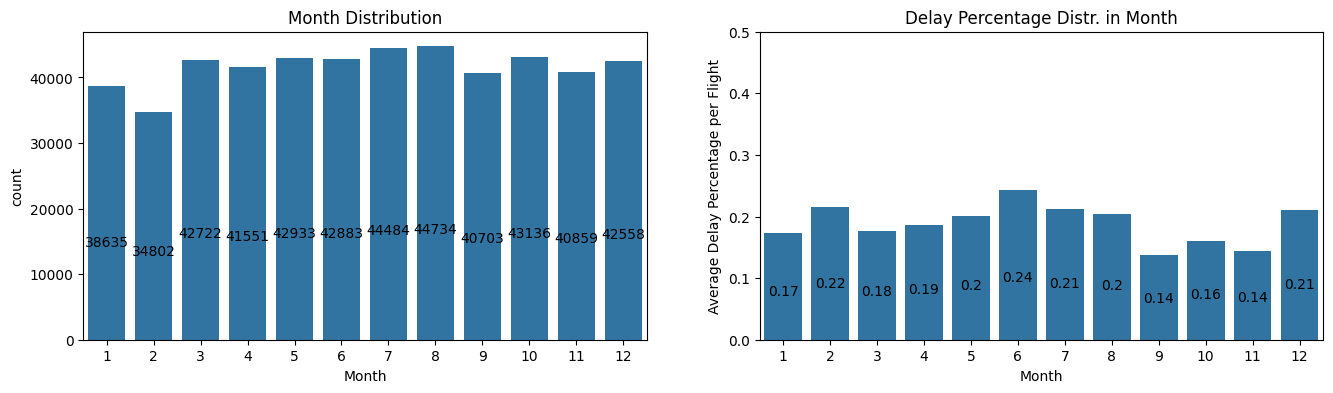

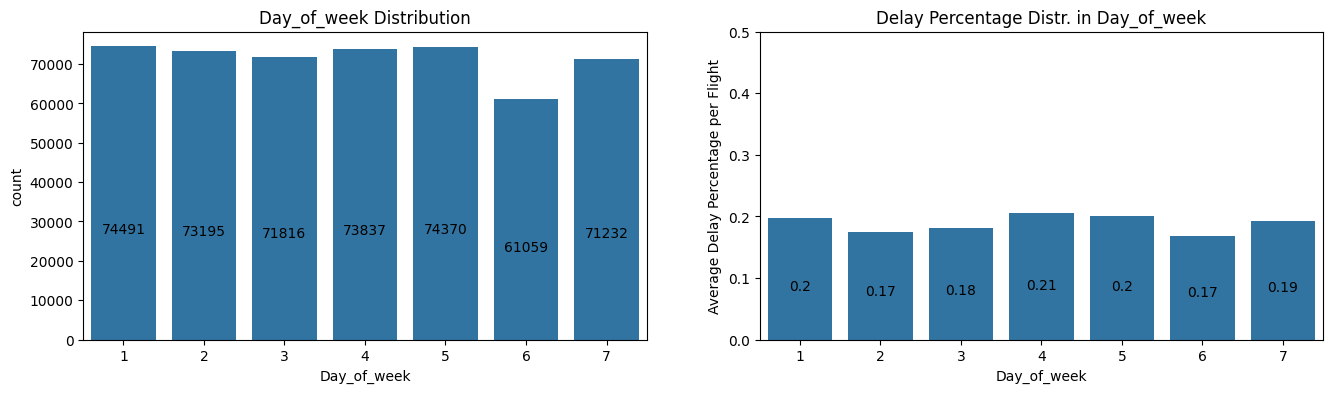

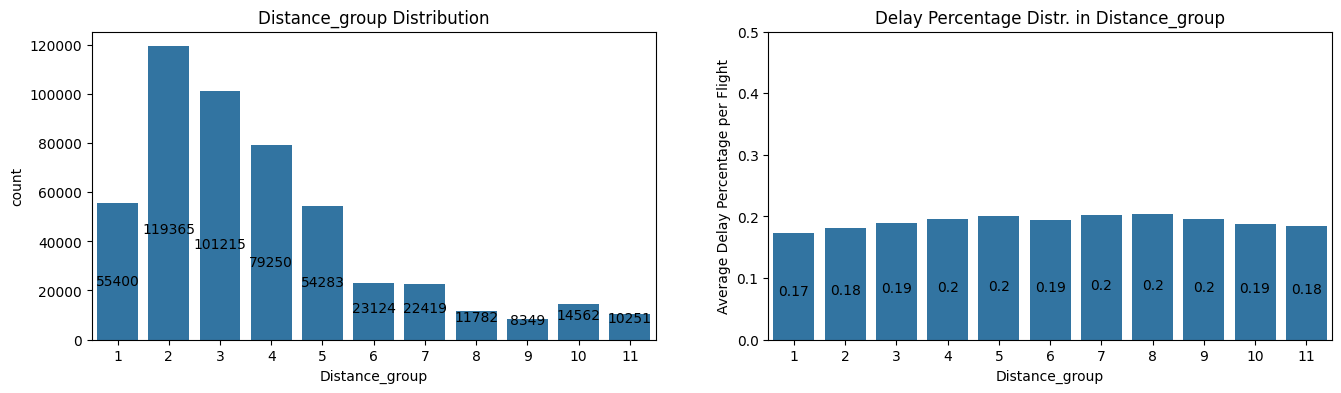

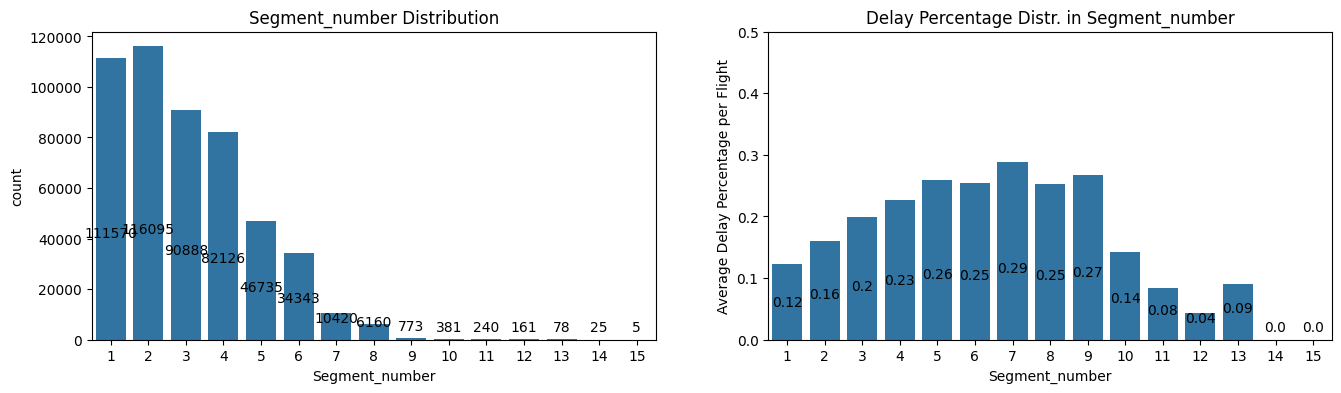

In [303]:
# Visualize Distributions of Categorical Variables
categorical = ['DEP_TIME_BLK', 'MONTH', 'DAY_OF_WEEK', 'DISTANCE_GROUP', 
               'SEGMENT_NUMBER']

for column in categorical:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

    # Figure #1: Bar Chart of the Categorical Feature Counts
    sns.countplot(x=column, data=df, ax=axes[0])
    axes[0].set_xlabel(column.capitalize())
    axes[0].set_title(f"{column.capitalize()} Distribution")
    add_labels(axes, 0)

    # Compute the percentage of 1s in the binary variable for each category
    category_percent = df.groupby(column)['DEP_DEL15'].mean()
    
    # Figure #2: Bar Chart of the Categrocial Feature vs Delay Percentage
    sns.barplot(x=category_percent.index, y=category_percent.values, ax=axes[1])
    axes[1].set_xlabel(column.capitalize())
    axes[1].set_ylabel("Average Delay Percentage per Flight")
    axes[1].set_ylim(0, 0.5)
    axes[1].set_title(f"Delay Percentage Distr. in {column.capitalize()}")
    add_labels(axes, 1)

plt.show()

Inferences from Above
- Departure time blocks seem to have a very high influence on delay percentage.
As mentioned earlier, by breaking it down into three features, I can look closer
at the data to see which part of the block is influencing delay percentage the 
most.
- Distance groups and segment numbers are heavily skewed right, which can pose a
problem later for algorithm that assumes gaussian distribution of count.
- Airplanes in the middle of their segment have the highest delay percentages
than those who are on the first or last few segments.
- None of the remaining features seem to have much of an impact on delay percentage.

Now, I'll look into airlines. Since there are too many different airline, 
I'm going to look into their delay percentages in this dataset from a table.

In [304]:
# See each individual airline's delay perecentages
airline_percentages = df.groupby('CARRIER_NAME')['DEP_DEL15'].mean()
airline_percentages.columns = ['Airline', 'Delay Percentage']
airline_percentages.sort_values(ascending=False)

CARRIER_NAME
Frontier Airlines Inc.          0.260563
JetBlue Airways                 0.249808
Atlantic Southeast Airlines     0.228265
Southwest Airlines Co.          0.209540
American Airlines Inc.          0.202963
United Air Lines Inc.           0.194793
Comair Inc.                     0.193570
Spirit Air Lines                0.193548
Mesa Airlines Inc.              0.188976
Allegiant Air                   0.179646
American Eagle Airlines Inc.    0.178972
SkyWest Airlines Inc.           0.177330
Endeavor Air Inc.               0.172811
Alaska Airlines Inc.            0.166053
Midwest Airline, Inc.           0.160344
Delta Air Lines Inc.            0.148418
Hawaiian Airlines Inc.          0.082121
Name: DEP_DEL15, dtype: float64

Inferences from Above
- The airline of the flight have very diverse delay perecentages.
- It appears some airlines, like Hawaiian Airlines Inc., prioritize the flight
not being delayed, while others are known for constant delays, like Frontier
Airlines.

Now I'll look into airports data, which is stored in two features:
`DEPARTING_AIRPORT` and `PREVIOUS_AIRPORT`.

In [305]:
print(f"# of Departing Airports: {df['DEPARTING_AIRPORT'].nunique()}")
print(df['DEPARTING_AIRPORT'].value_counts()[:20])

# of Departing Airports: 96
DEPARTING_AIRPORT
Atlanta Municipal                    30593
Chicago O'Hare International         25303
Dallas Fort Worth Regional           22537
Stapleton International              19119
Douglas Municipal                    17724
Los Angeles International            16649
Houston Intercontinental             13749
Phoenix Sky Harbor International     13187
San Francisco International          12879
LaGuardia                            12824
McCarran International               12693
Detroit Metro Wayne County           12553
Minneapolis-St Paul International    12274
Logan International                  11232
Orlando International                10888
Seattle International                10823
Ronald Reagan Washington National    10438
Newark Liberty International         10305
John F. Kennedy International         9674
Philadelphia International            9081
Name: count, dtype: int64


In [306]:
print(f"# of Previous Airports: {df['PREVIOUS_AIRPORT'].nunique()}")
print(df['PREVIOUS_AIRPORT'].value_counts()[:20])

# of Previous Airports: 353
PREVIOUS_AIRPORT
NONE                                 111570
Atlanta Municipal                     15880
Chicago O'Hare International          13894
Stapleton International               10495
Dallas Fort Worth Regional            10244
Los Angeles International              9800
Douglas Municipal                      9787
LaGuardia                              9274
Logan International                    9075
Phoenix Sky Harbor International       8340
McCarran International                 8170
San Francisco International            7779
Detroit Metro Wayne County             7665
Orlando International                  7505
Houston Intercontinental               7236
Ronald Reagan Washington National      7188
Seattle International                  7099
Newark Liberty International           6983
Minneapolis-St Paul International      6906
John F. Kennedy International          6387
Name: count, dtype: int64


Takeaways from Above
- There are a lot of distinct airports in this dataset
- The same airports are near the highest of the list.

Since there's too many distinct airports and we can see airport's delay 
percentages through `DEP_AIRPORT_HIST` and business from 
`AVG_MONTHLY_PASS_AIRPORT`, the individual airport name isn't as useful. The 
other two metrics about airport data tell us more information about the airport
that is more relevant than the name. Same logic applies to the airlines. These 
variables are strings and not numbers with a high cardinality, making it hard to
encode. Therefore, we can remove the departing, arriving airports, and airline. 

#### Numerical Features
This section analyzes the distribution of all of the numerical features. Since
there are a surplus of numerical features, I'm going to split it into groups
based on what the feature is trying to capture to see if the general area is 
making an impact on delay percentage. 

The groups will be the following:
1. Airport Features
2. Flight Features
3. Weather Features
4. Historical Features

In each group, I'll see how the features are distributed, how delay perecntage 
changed based off of changes in the features, and how many outliers are there 
through a histogram, color mesh, and box plot respectively. This will allow me 
to detect any imbalances in any of the features and give me insight on future 
feature engineering.

##### Airport Features
The first group I'm analyzing thoroughly is airport information at the flight's
departure time. This includes # of concurrent flights, 

In [307]:
airport_features = ['CONCURRENT_FLIGHTS', 'AIRPORT_FLIGHTS_MONTH', 
                    'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
                    'LATITUDE', 'LONGITUDE']

In [308]:
# Display Descriptive Statistics of Each Airport Feature
df[airport_features].describe()

,CONCURRENT_FLIGHTS,AIRPORT_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,LATITUDE,LONGITUDE
count,500000.000000,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000
mean,27.870400,12689.095636,3458.904258,1.589861e+06,36.705433,-94.229135
std,21.541919,8845.771109,4256.679982,1.125494e+06,5.502010,17.902463
min,1.000000,1100.000000,1.000000,7.047600e+04,18.440000,-159.346000
25%,11.000000,5345.000000,654.000000,6.732210e+05,33.436000,-106.377000
50%,23.000000,11562.000000,2251.000000,1.486066e+06,37.505000,-87.906000
75%,39.000000,17615.000000,4803.000000,2.006675e+06,40.779000,-80.936000
max,109.000000,35256.000000,21837.000000,4.365661e+06,61.169000,-66.002000


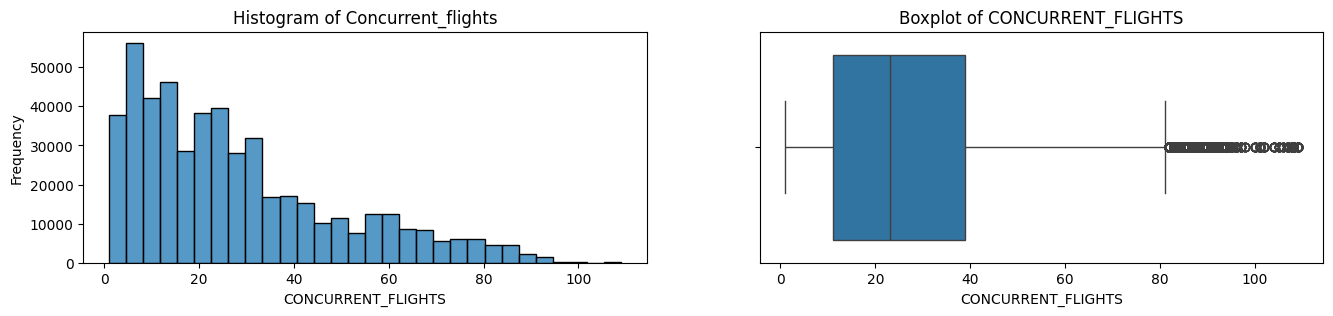

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/3994683892.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


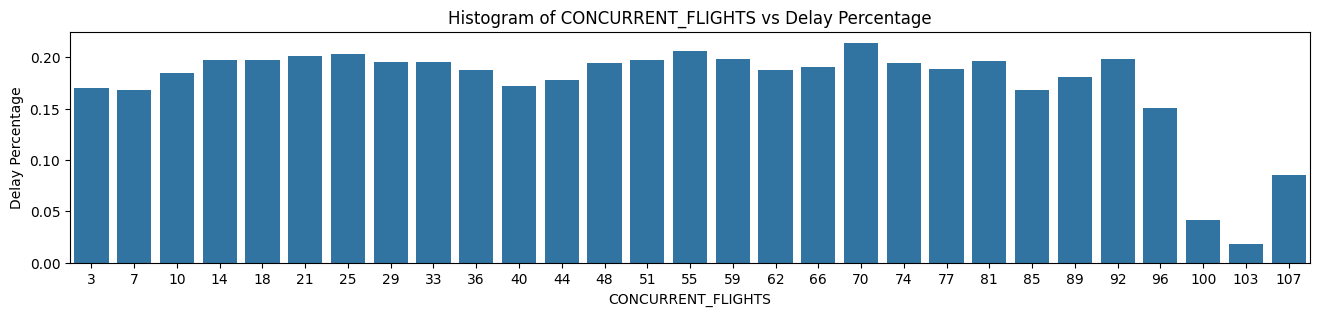

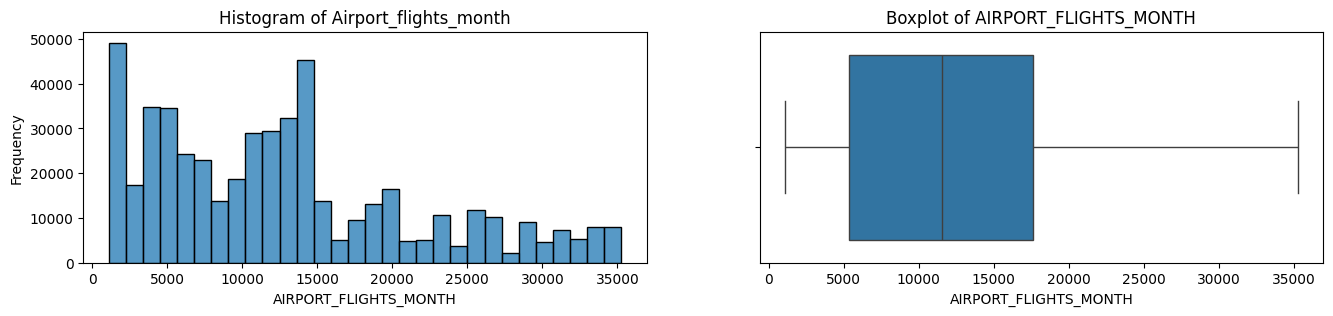

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/3994683892.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


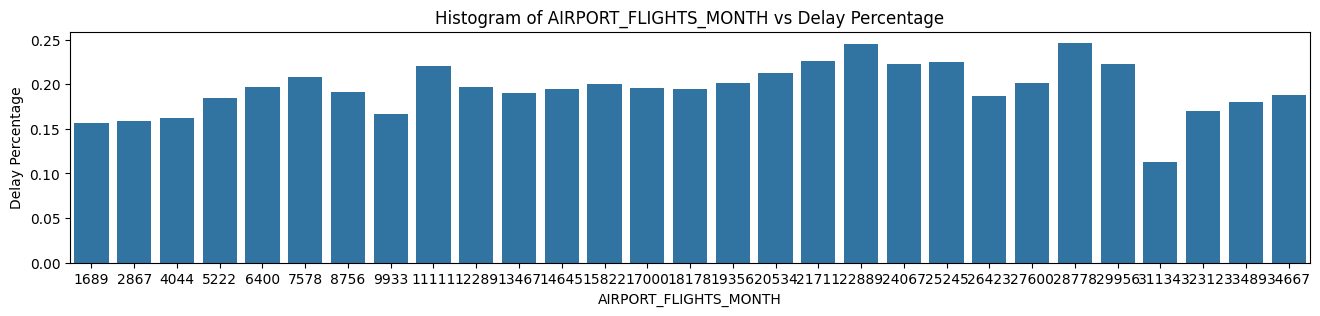

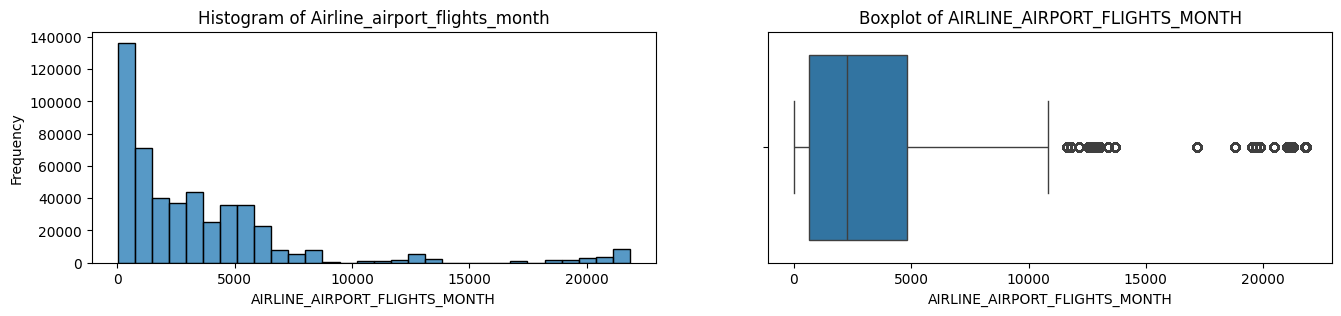

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/3994683892.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


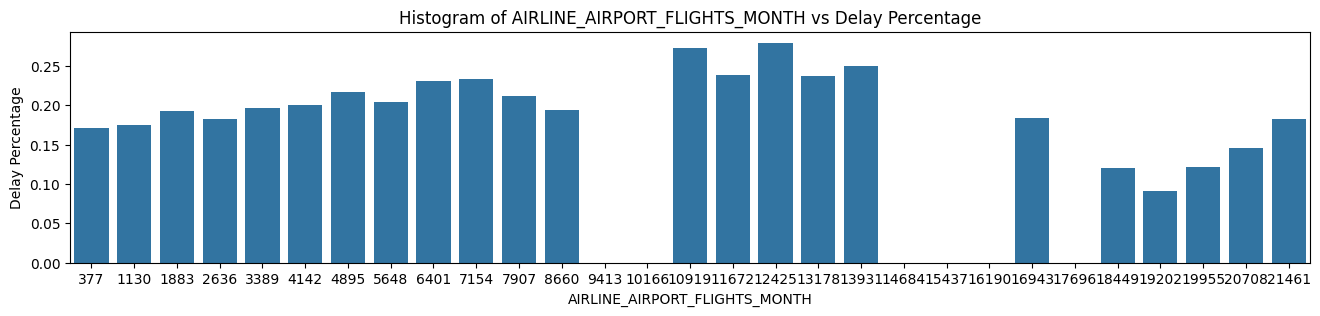

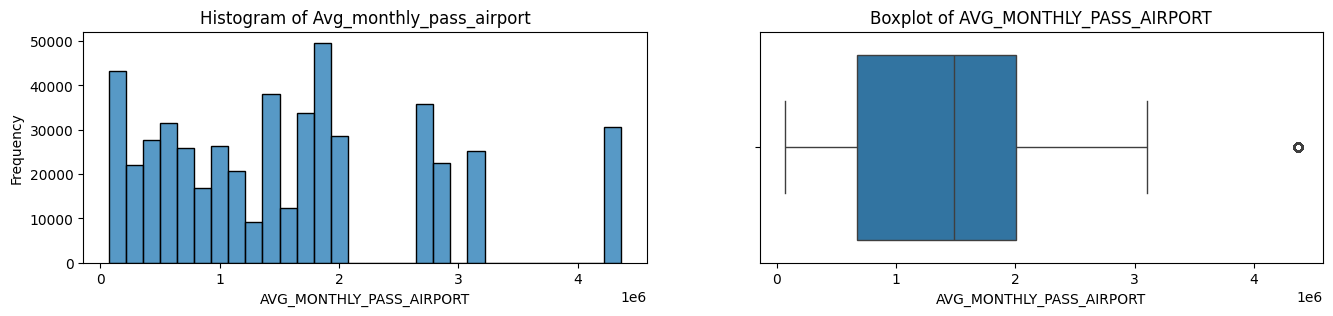

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/3994683892.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


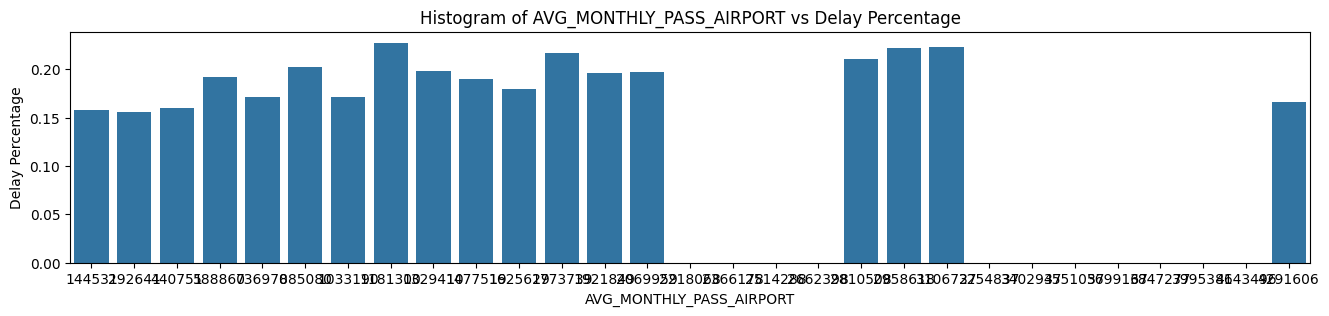

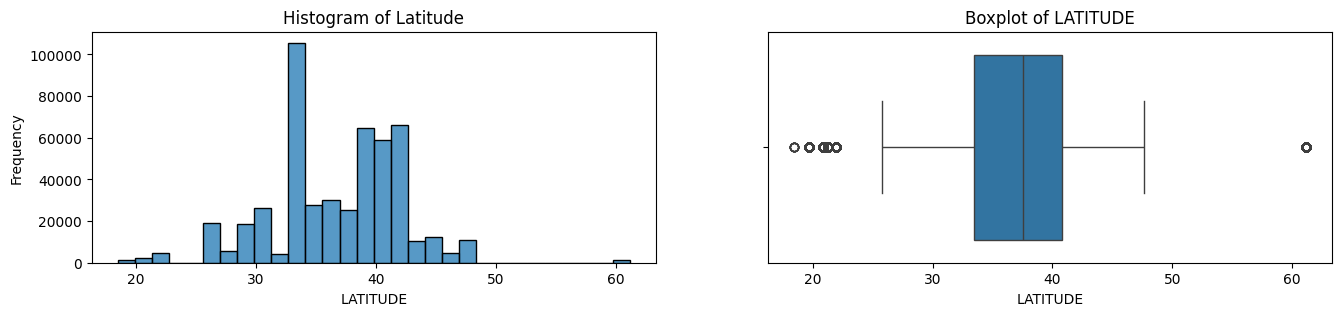

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/3994683892.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


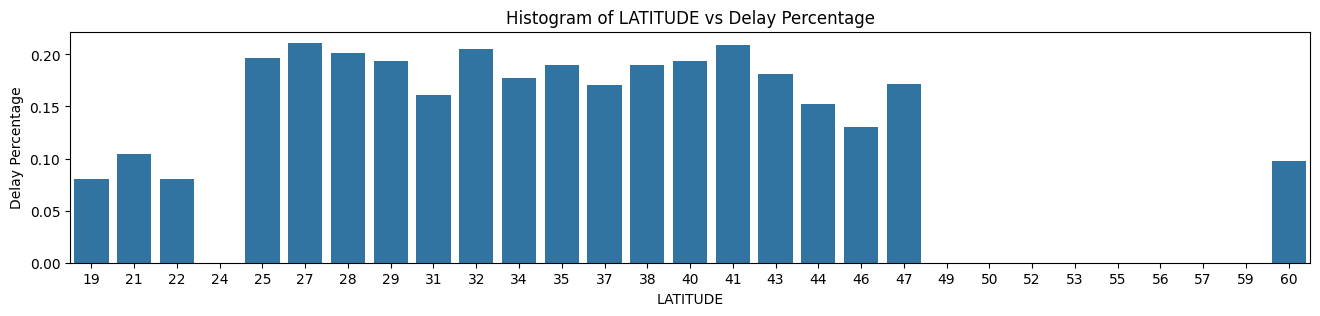

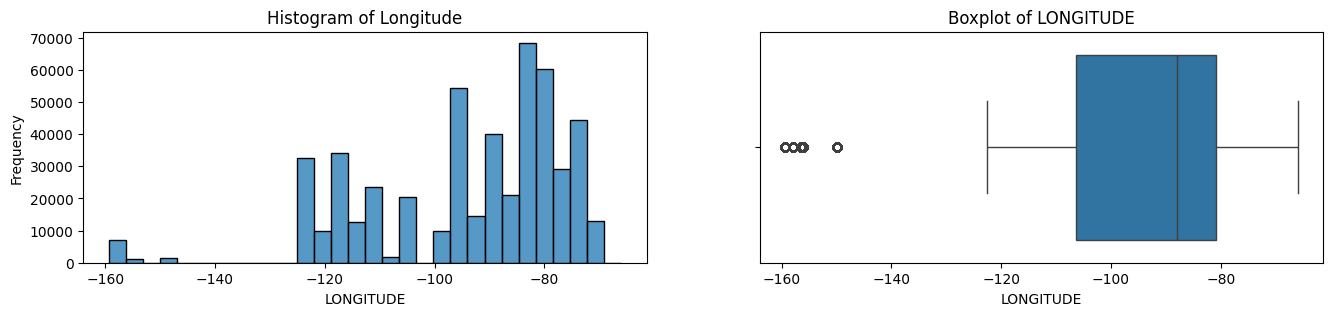

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/3994683892.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


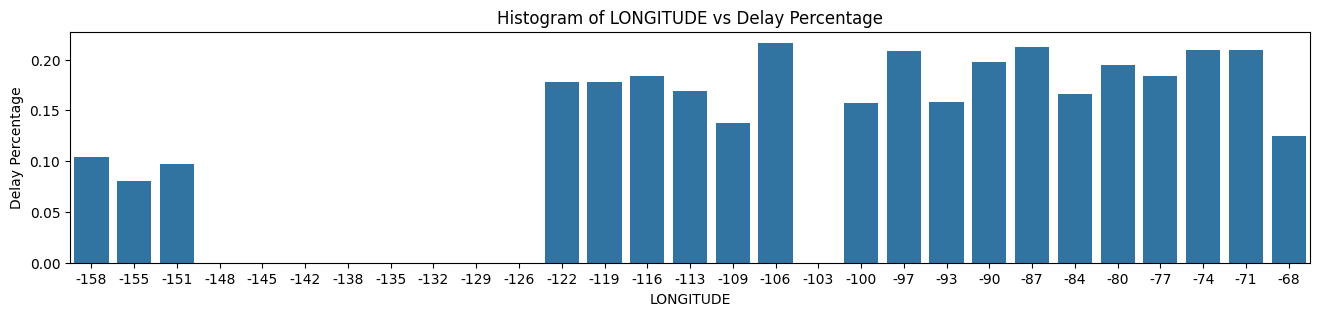

In [309]:
# Visualize the Distrubutions of Numerical Variables
for column in airport_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 3))
    
    # Figure #1: Bar plot of percentage of 1s in each bin
    sns.histplot(data=df, x=column, bins=30, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    axes[0].set_title(f"Histogram of {column.capitalize()}")

    # Figure #2: Boxplot of Numerical Feature
    sns.boxplot(data=df, x=column, ax=axes[1])
    axes[1].set_title(f"Boxplot of {column}")
    plt.show()

    # Define bins for the x-axis
    x_bins = np.linspace(df[column].min(), df[column].max(), 30)
    bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()
    bin_summary[column] = bin_summary[column].apply(lambda x: round(x.mid))
    
    # Figure #3: Histogram
    plt.figure(figsize=(16,3))
    sns.barplot(data=bin_summary, x=column, y='DEP_DEL15')
    plt.title(f"Histogram of {column} vs Delay Percentage")
    plt.ylabel(f"Delay Percentage")
    plt.show()

Takeaways from Above
- Concurrent Flights is skewed right.
- There are some outliers in `longitude` and `latitude`, where Western 
and Southern airports seem to have a lower delay percentage than the others.
- The remaining airport features does't seem to have much of an impact on delay
percentage.
  - One possible explanation is that airports who handle more flights have 
  scaled their operations to ensure there won't be more delays than before.


##### Flight Features
Next, I'm going to look into the flight features, include airline features.

In [310]:
flight_features = ['NUMBER_OF_SEATS', 'AIRLINE_FLIGHTS_MONTH', 
                   'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 
                   'PLANE_AGE']

In [311]:
# Display Descriptive Statistics of Each Flight's Feature
df[flight_features].describe()

,NUMBER_OF_SEATS,AIRLINE_FLIGHTS_MONTH,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,133.624802,62798.365862,0.000097,0.000136,11.526468
std,46.554940,34383.649728,0.000087,0.000047,6.941075
min,44.000000,5582.000000,0.000000,0.000007,0.000000
25%,90.000000,24966.000000,0.000034,0.000099,5.000000
50%,143.000000,70878.000000,0.000062,0.000125,12.000000
75%,172.000000,86312.000000,0.000144,0.000177,17.000000
max,337.000000,117728.000000,0.000348,0.000229,32.000000


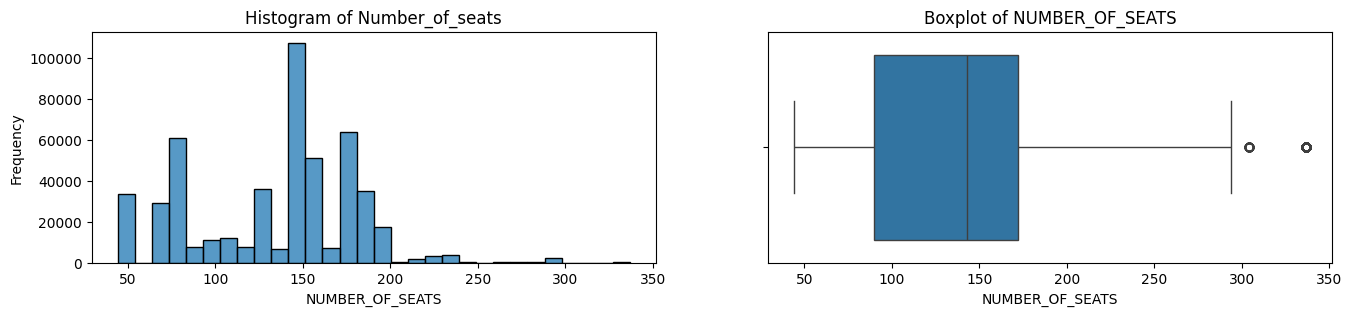

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/3637506119.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


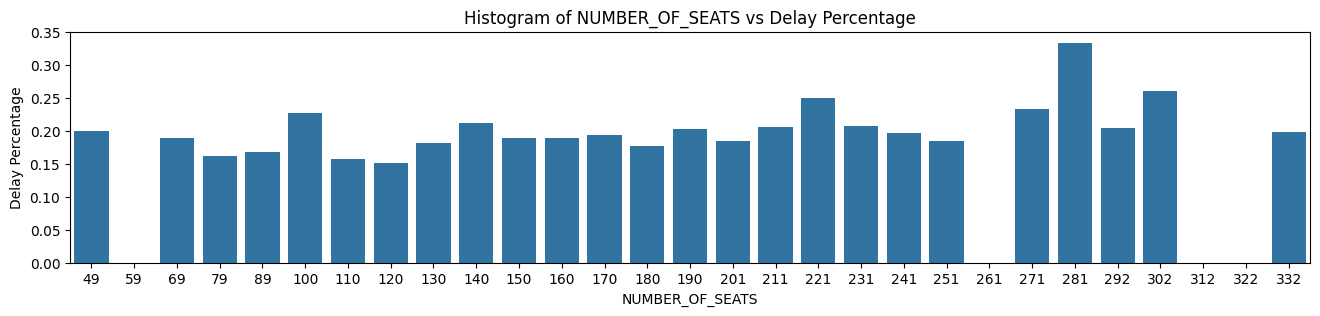

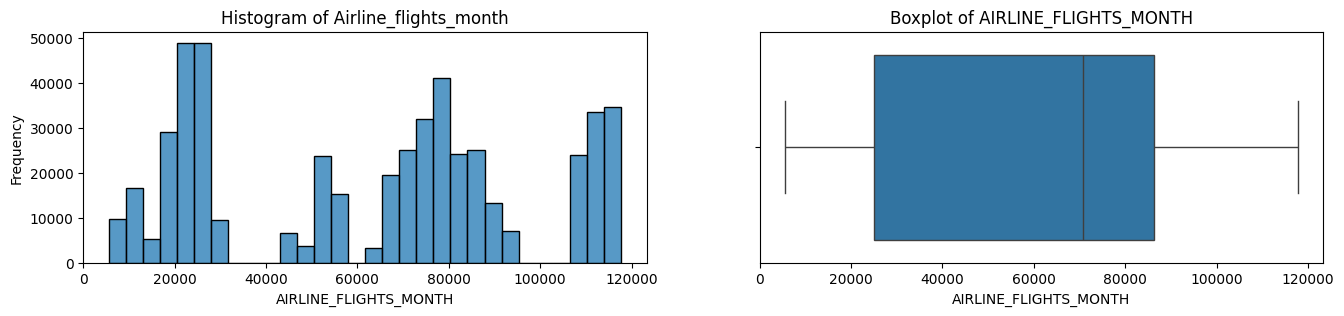

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/3637506119.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


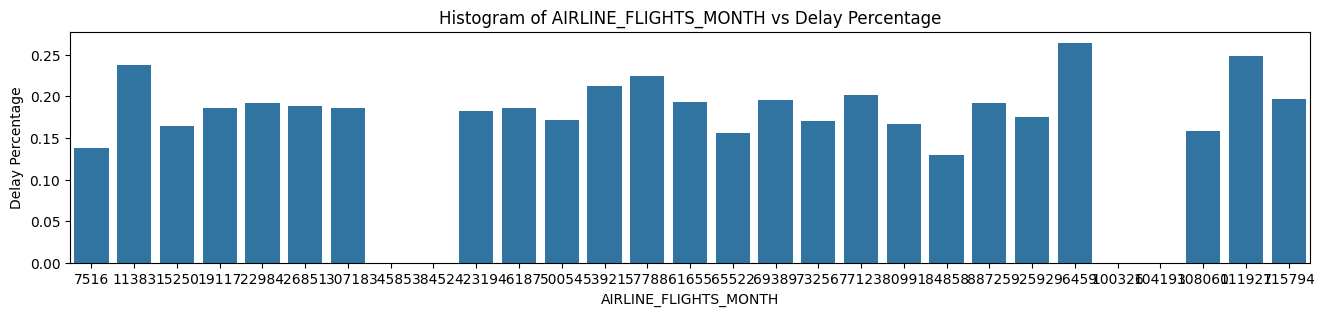

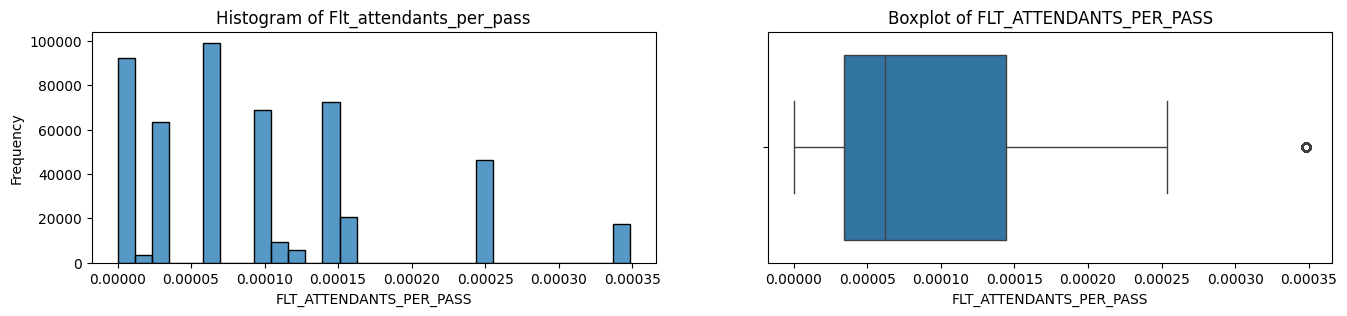

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/3637506119.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


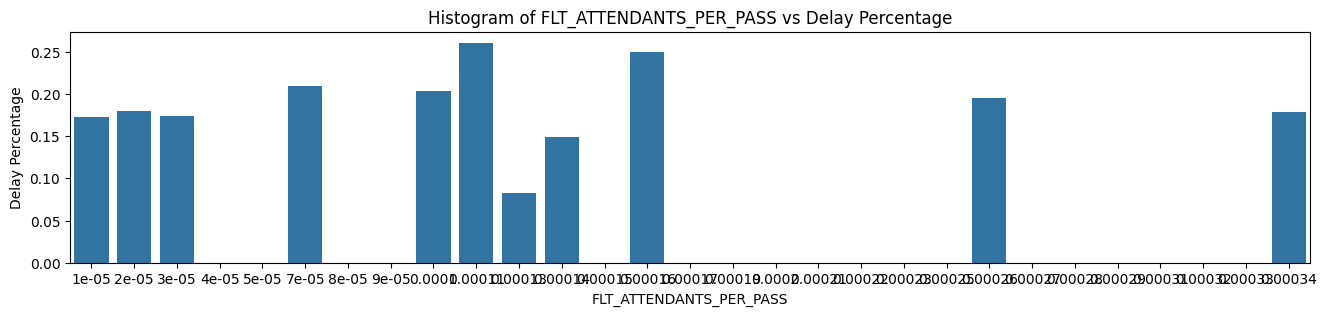

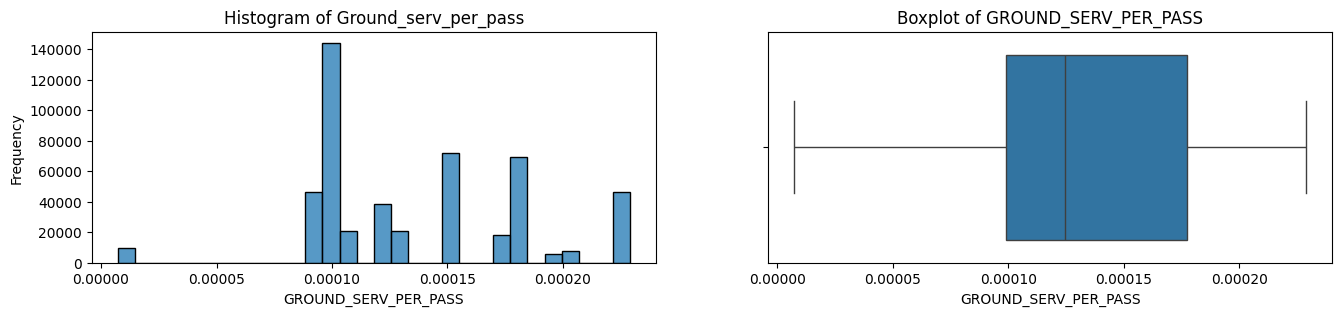

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/3637506119.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


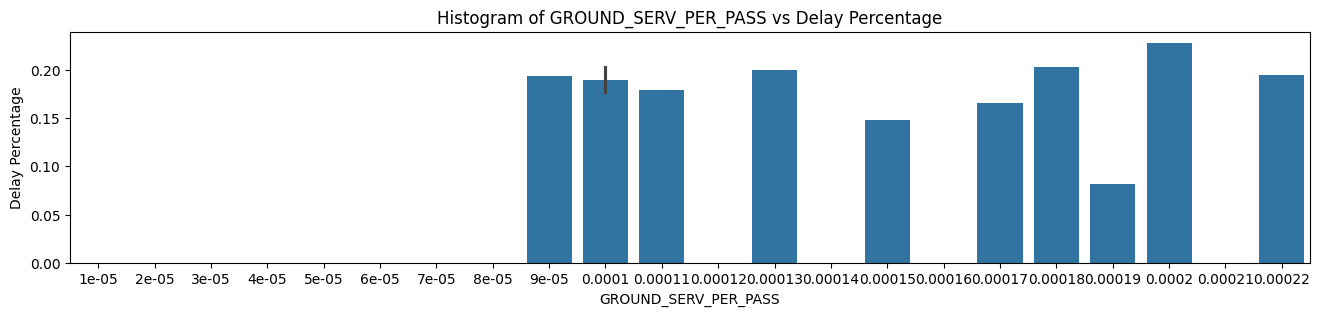

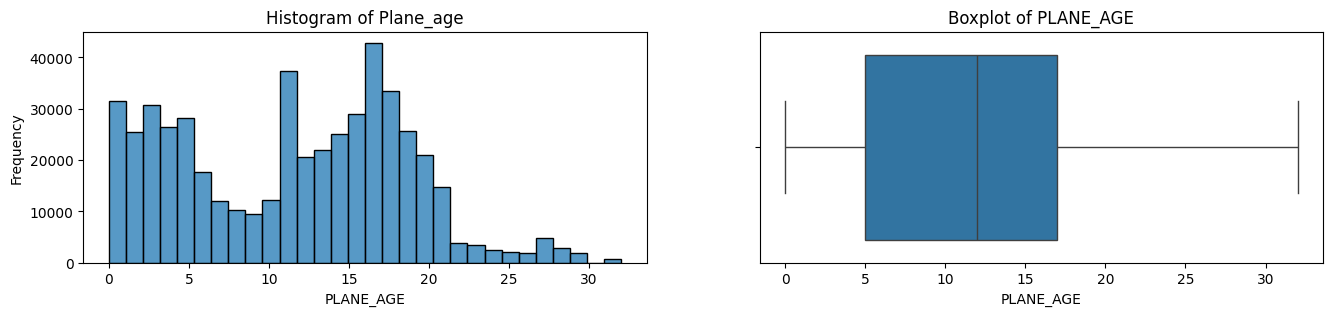

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/3637506119.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


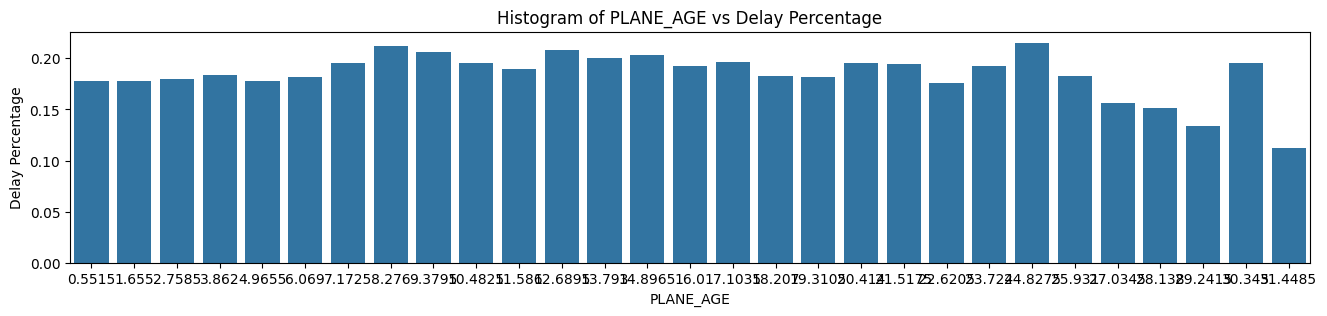

In [312]:
# Visualize Distributions of Historical Features with Count and Delay %
for column in flight_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 3))
    
    # Figure #1: Bar plot of percentage of 1s in each bin
    sns.histplot(data=df, x=column, bins=30, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    axes[0].set_title(f"Histogram of {column.capitalize()}")

    # Figure #2: Boxplot of Numerical Feature
    sns.boxplot(data=df, x=column, ax=axes[1])
    axes[1].set_title(f"Boxplot of {column}")
    plt.show()

    # Define bins for the x-axis
    x_bins = np.linspace(df[column].min(), df[column].max(), 30)
    bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()
    if df[column].min() < 1:
        bin_summary[column] = bin_summary[column].apply(lambda x: round(x.mid,5))
    else:
        bin_summary[column] = bin_summary[column].apply(lambda x: round(x.mid))
    
    # Figure #3: Histogram
    plt.figure(figsize=(16,3))
    sns.barplot(data=bin_summary, x=column, y='DEP_DEL15')
    plt.title(f"Histogram of {column} vs Delay Percentage")
    plt.ylabel(f"Delay Percentage")
    plt.show()

Takeaways from Above
- There are some outliers with high `NUMBER_OF_SEATS` or high 
`FLT_ATTENDANTS_PER_PASS`.
- `FLT_ATTENDANTS_PER_PAS` and `GROUND_SERV_PER_PASS` have really small scales,
which could influnece the model to assign lower weights than it should be. 
-  Flights with high `PLANE_AGE` have lower delay percentage than newer planes.
However, this could be due to the data imbalance in that feature.
- No plane feature seem to play a huge factor in delay percentages.

##### Weather Features

Next, I'm going to look into the impact of weather on delay percentage.

In [313]:
weather = ['PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND']

In [314]:
# Display Descriptive Statistics of Each Weather Feature
df[weather].describe()

,PRCP,SNOW,SNWD,TMAX,AWND
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,0.103664,0.031942,0.092462,71.457109,8.338772
std,0.341675,0.314315,0.734139,18.381304,3.608775
min,0.000000,0.000000,0.000000,-10.000000,0.000000
25%,0.000000,0.000000,0.000000,59.000000,5.820000
50%,0.000000,0.000000,0.000000,74.000000,7.830000
75%,0.020000,0.000000,0.000000,86.000000,10.290000
max,11.630000,17.200000,25.200000,115.000000,33.780000


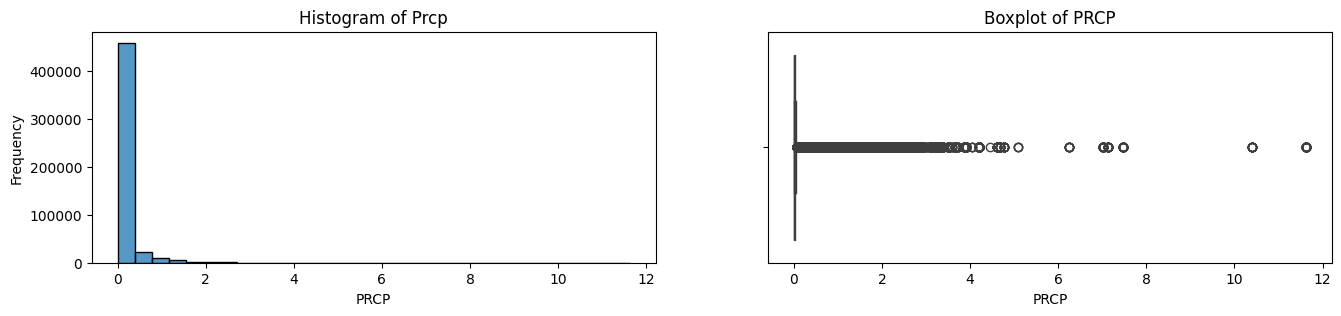

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/1525334549.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


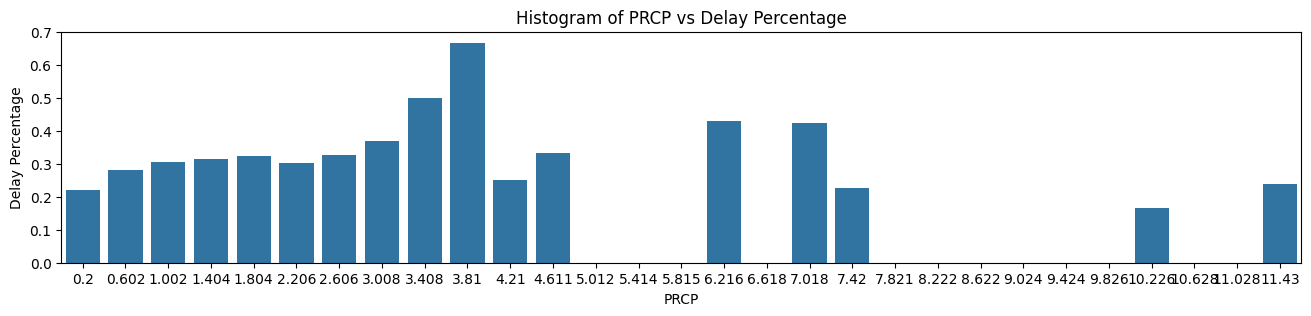

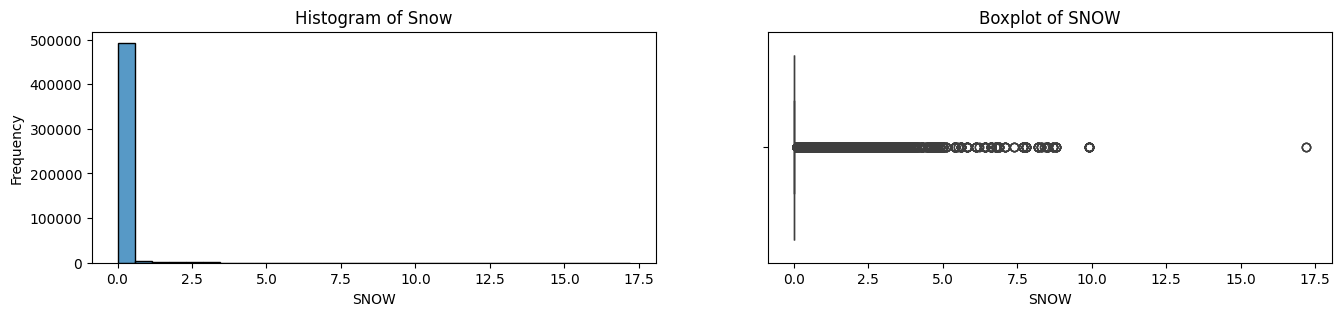

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/1525334549.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


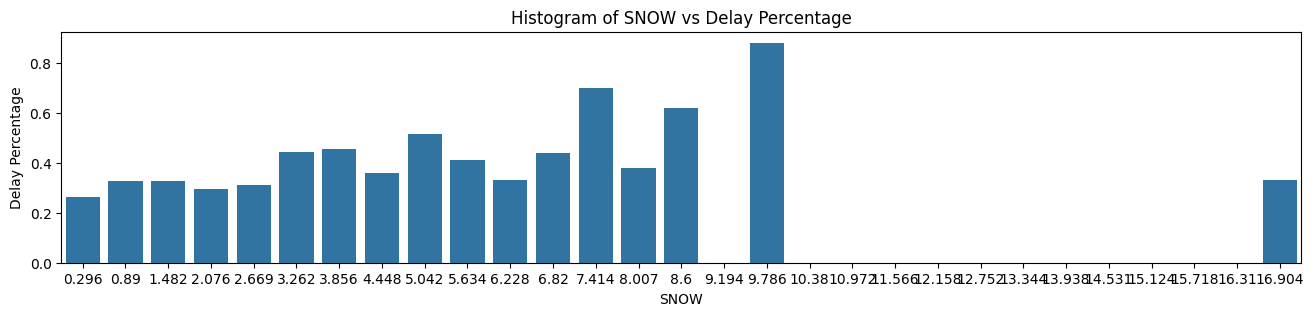

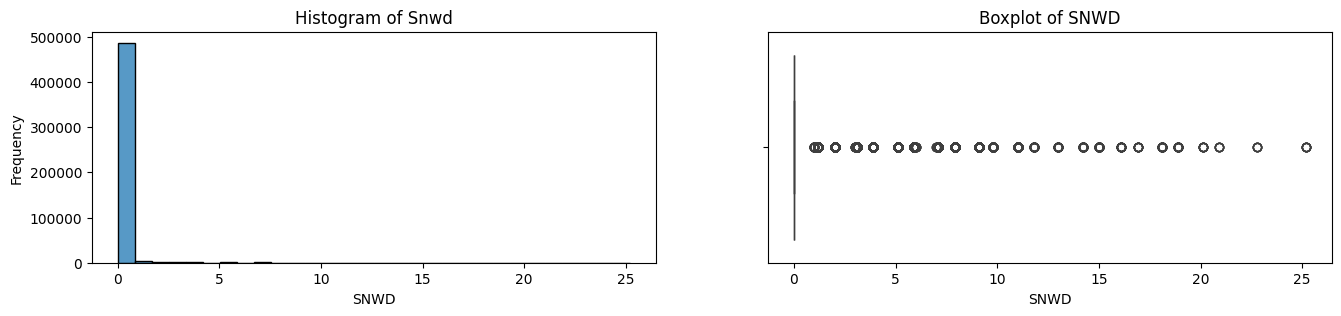

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/1525334549.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


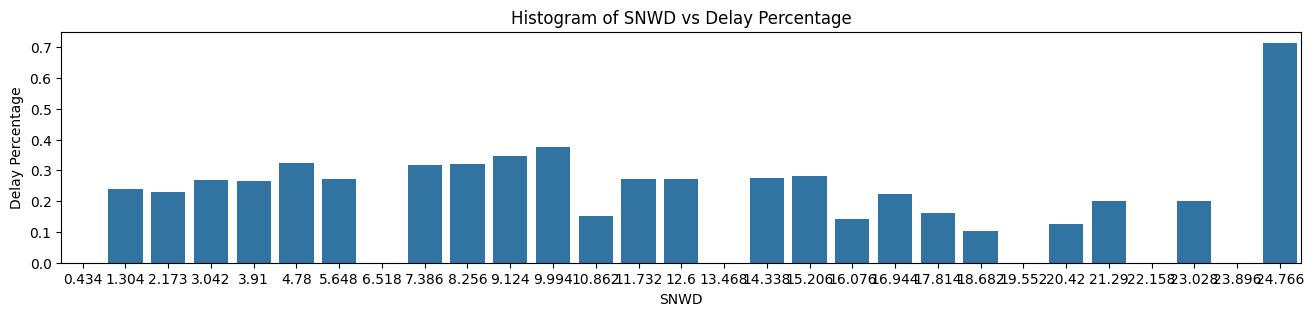

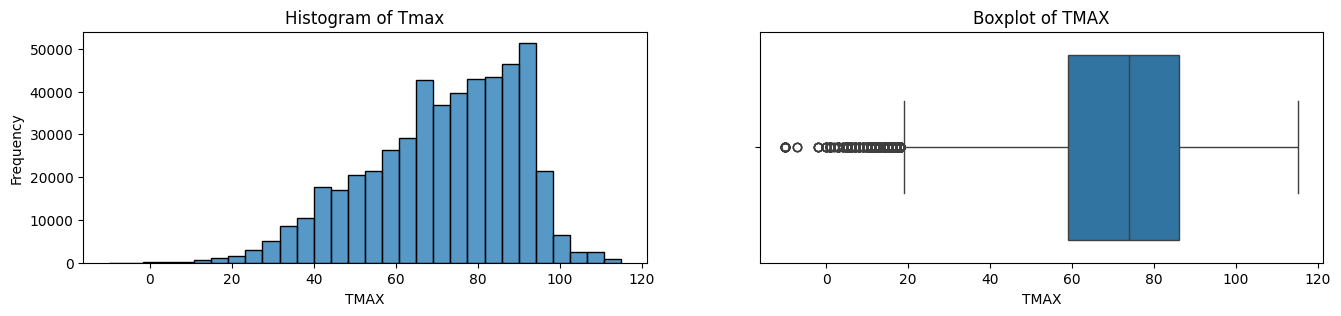

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/1525334549.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


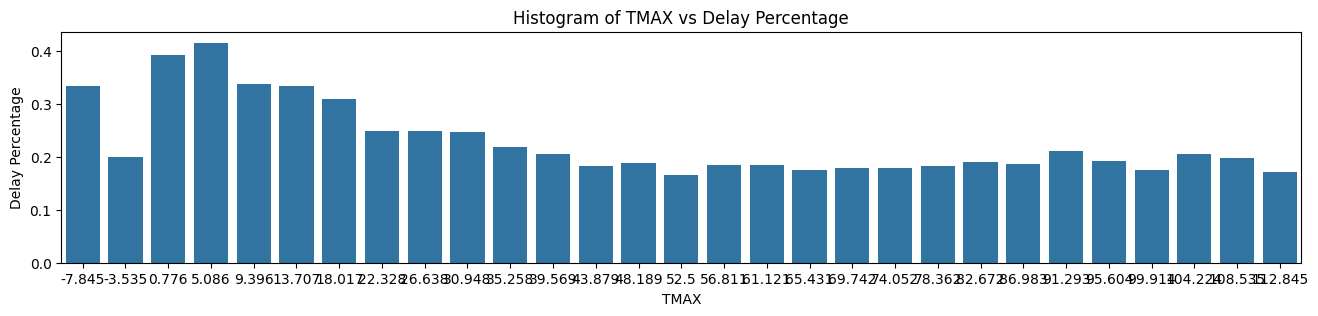

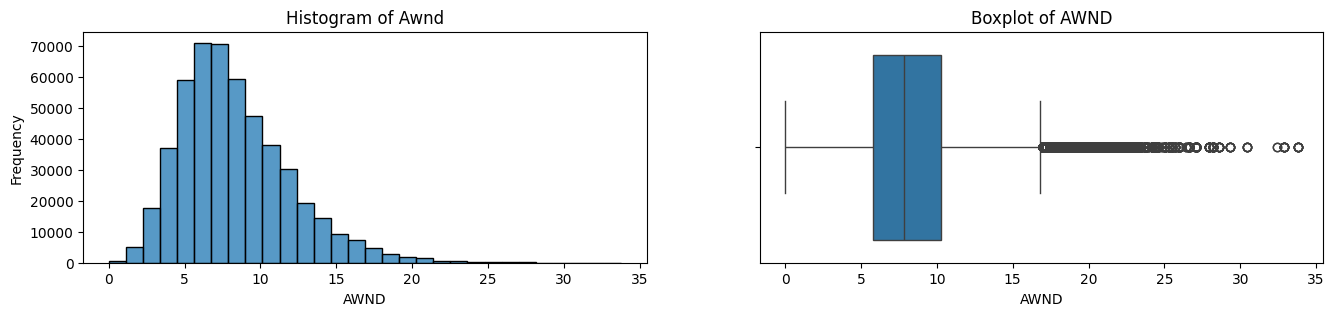

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/1525334549.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


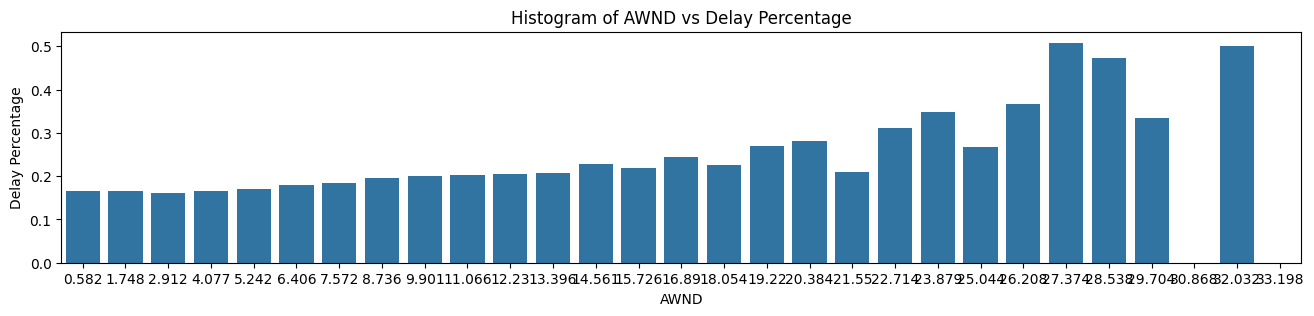

In [315]:
# Visualize Distributions of Historical Features with Count and Delay %
for column in weather:
    fig, axes = plt.subplots(1, 2, figsize=(16, 3))
    
    # Figure #1: Bar plot of percentage of 1s in each bin
    sns.histplot(data=df, x=column, bins=30, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    axes[0].set_title(f"Histogram of {column.capitalize()}")

    # Figure #2: Boxplot of Numerical Feature
    sns.boxplot(data=df, x=column, ax=axes[1])
    axes[1].set_title(f"Boxplot of {column}")
    plt.show()

    # Define bins for the x-axis
    x_bins = np.linspace(df[column].min(), df[column].max(), 30)
    bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()
    bin_summary[column] = bin_summary[column].apply(lambda x: round(x.mid, 3))
    
    # Figure #3: Histogram
    plt.figure(figsize=(16,3))
    sns.barplot(data=bin_summary, x=column, y='DEP_DEL15')
    plt.title(f"Histogram of {column} vs Delay Percentage")
    plt.ylabel(f"Delay Percentage")
    plt.show()

Takeaways from Above
- Severe weather can be seen to have a big impact on flight delays, as there
generally seems to be positive correlation between weather features and delay 
percentages.
- Weather variables are severely skewed right and have outliers with high values. 
This makes sense as severe weather is uncommon. This is a form of data imbalance
and I will treat this in my data preprocessing section.

##### Historical Features
Lastly, I'm going to look into the historical features, which include the past delay
percentage in the carrier, airport, day, and departure block.

In [316]:
historical = ['CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
              'DEP_BLOCK_HIST']

In [317]:
# Display Descriptive Statistics of Each Historical Feature
df[historical].describe()

,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,0.189120,0.187848,0.189178,0.189094
std,0.047469,0.041577,0.038267,0.077642
min,0.064408,0.043423,0.104450,0.055562
25%,0.154651,0.166740,0.160868,0.127692
50%,0.186516,0.187867,0.191473,0.187484
75%,0.215945,0.202486,0.219939,0.242114
max,0.350235,0.352160,0.270709,0.390600


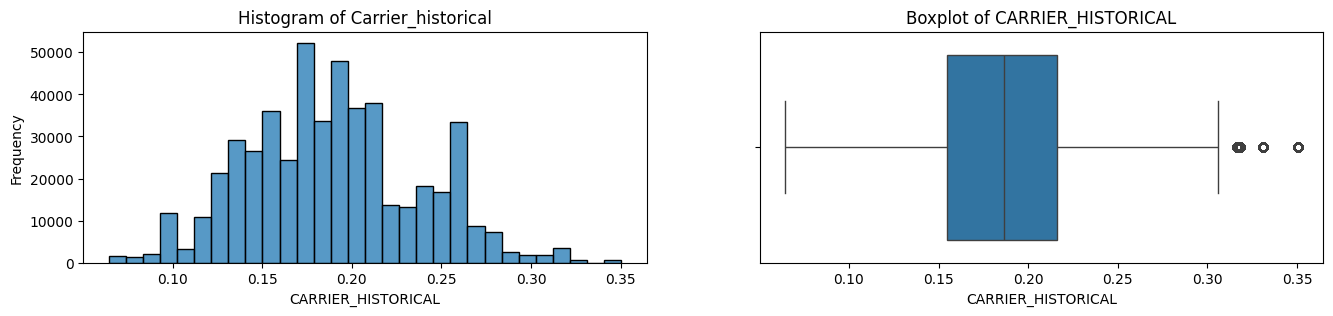

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/4021971410.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


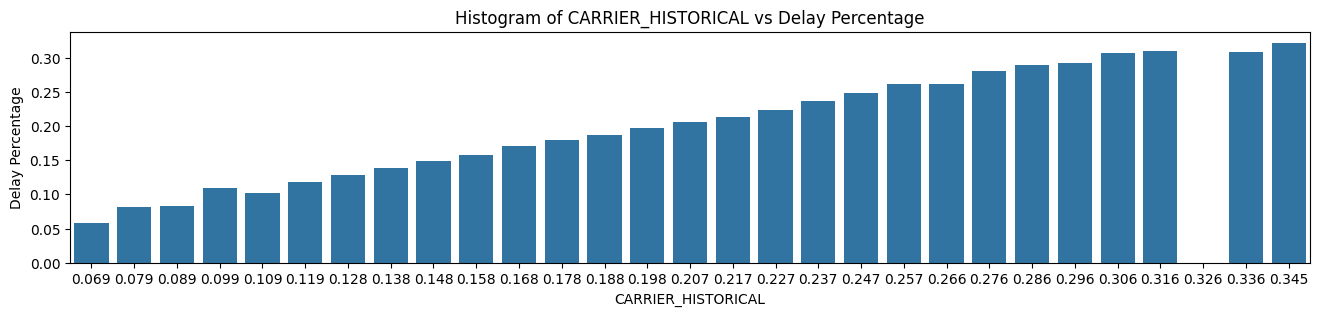

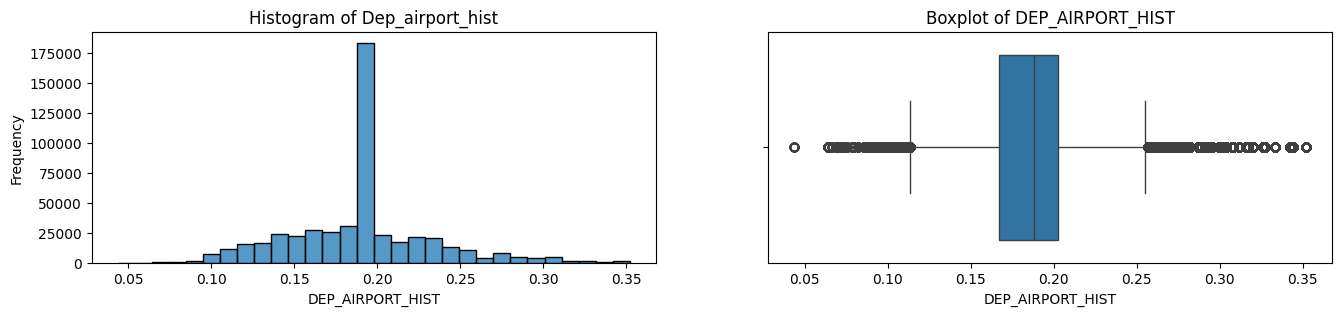

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/4021971410.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


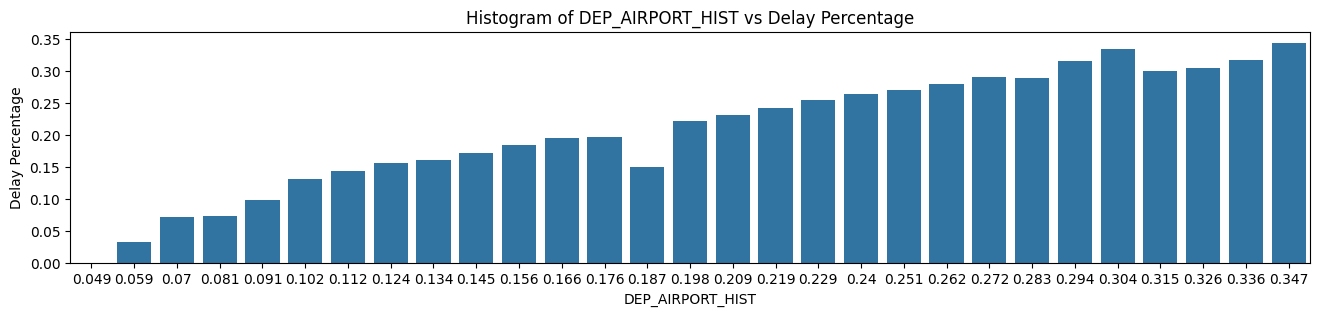

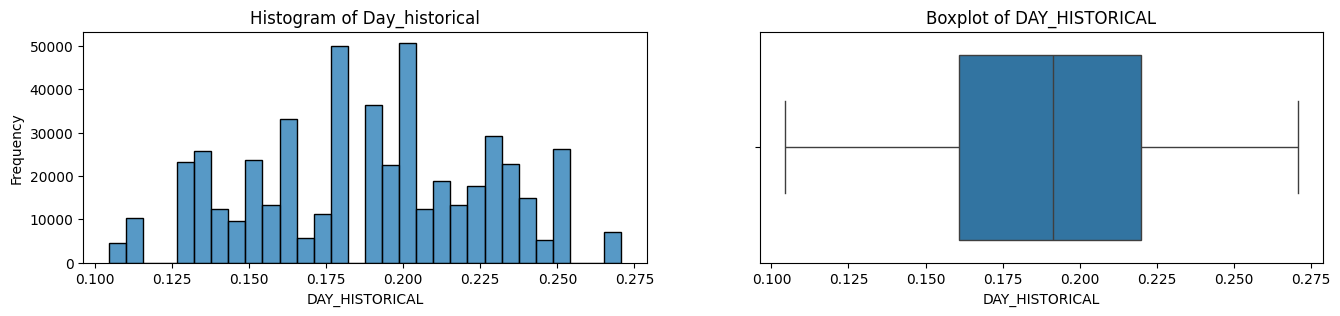

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/4021971410.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


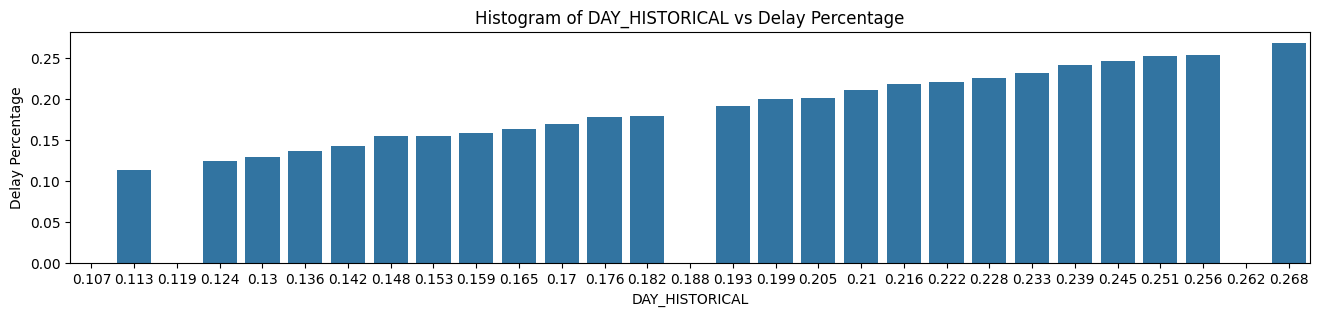

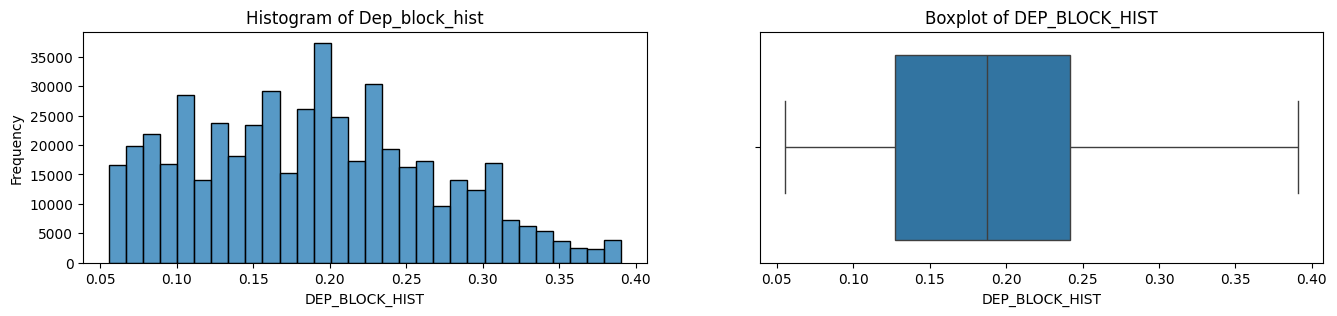

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12663/4021971410.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()


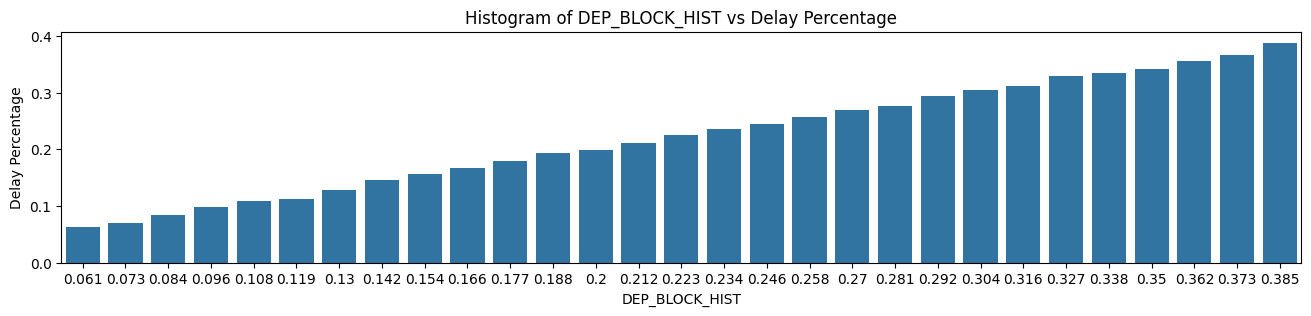

In [318]:
# Visualize Distributions of Historical Features with Count and Delay %
for column in historical:
    fig, axes = plt.subplots(1, 2, figsize=(16, 3))
    
    # Figure #1: Bar plot of percentage of 1s in each bin
    sns.histplot(data=df, x=column, bins=30, ax=axes[0])
    axes[0].set_ylabel("Frequency")
    axes[0].set_title(f"Histogram of {column.capitalize()}")

    # Figure #2: Boxplot of Numerical Feature
    sns.boxplot(data=df, x=column, ax=axes[1])
    axes[1].set_title(f"Boxplot of {column}")
    plt.show()

    # Define bins for the x-axis
    x_bins = np.linspace(df[column].min(), df[column].max(), 30)
    bin_summary = df.groupby(pd.cut(df[column], bins=x_bins))['DEP_DEL15'].mean().reset_index()
    bin_summary[column] = bin_summary[column].apply(lambda x: round(x.mid, 3))
    
    # Figure #3: Histogram
    plt.figure(figsize=(16,3))
    sns.barplot(data=bin_summary, x=column, y='DEP_DEL15')
    plt.title(f"Histogram of {column} vs Delay Percentage")
    plt.ylabel(f"Delay Percentage")
    plt.show()

Takeaways from Above
- The distribution in all of the historical features are approximately normal.
- They all have a clear positive correlation with current delay percentages 
compared other features.

## Data Preprocessing

I am checking for duplicate flights in the dataset, as we don't want to 
overweight a certain flight that has accidentally been added twice.

In [319]:
# Check for Duplicates
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 199


In [320]:
# Drop Duplicates
df.drop_duplicates(inplace = True)

### Feature Engineering
As mentioned earlier, Departing Time Block (`DEP_TIME_BLK`) is a string with 
various information. On it's own, it represents the time period a flight can 
depart. However, it can rather be broken down into 3 int64 columns that can be
more useful to the model:
  - `START_DEPART`: Starting time of the eligible departure time period
  - `DURATION_BLOCK`: Duration of the eligible departure time period
  - `END_DEPART`: Ending time of the eligible departure time period

In [321]:
# Break down the departure time block into three new features
df[['START_DEPART', 'END_DEPART']] = df['DEP_TIME_BLK'] \
    .str.split('-', expand=True)
df['START_DEPART'] = df['START_DEPART'].apply(lambda x: int(int(x)/100))
df['END_DEPART'] = df['END_DEPART'].apply(lambda x: int(int(x)/100)+1)
df['DURATION_BLOCK'] = df['END_DEPART'] - df['START_DEPART']

# Do same thing to testing datasett
test_df[['START_DEPART', 'END_DEPART']] = test_df['DEP_TIME_BLK'] \
    .str.split('-', expand=True)
test_df['START_DEPART'] = test_df['START_DEPART'].apply(
    lambda x: int(int(x)/100))
test_df['END_DEPART'] = test_df['END_DEPART'].apply(
    lambda x: int(int(x)/100)+1)
test_df['DURATION_BLOCK'] = test_df['END_DEPART'] - test_df['START_DEPART']

# Drop original departure block
df.drop(columns=['DEP_TIME_BLK'], inplace=True)
test_df.drop(columns=['DEP_TIME_BLK'], inplace=True)

# See updated training dataset
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,START_DEPART,END_DEPART,DURATION_BLOCK
0,12,4,0,2,2,43,50,SkyWest Airlines Inc.,15165,70473,1304,1690031,3472966,0.000034,0.000099,14,Houston Intercontinental,29.983,-95.340,Eppley Airfield,0.28,0.0,0.0,85.0,5.37,0.202513,0.164248,0.181618,0.155223,9,10,1
1,3,3,0,1,4,59,76,Endeavor Air Inc.,33799,22191,3137,4365661,1212846,0.000000,0.000094,11,Atlanta Municipal,33.641,-84.427,Gulfport-Biloxi International,0.00,0.0,0.0,63.0,5.59,0.155571,0.187867,0.151269,0.179698,12,13,1
2,2,1,0,2,1,23,143,Southwest Airlines Co.,10780,94922,3110,1823051,13382999,0.000062,0.000099,16,Orlando International,28.432,-81.325,NONE,0.00,0.0,0.0,70.0,5.82,0.258887,0.187867,0.229539,0.259786,14,15,1
3,4,2,0,1,2,39,50,American Eagle Airlines Inc.,26142,25138,5184,3103410,1204766,0.000348,0.000107,14,Chicago O'Hare International,41.978,-87.906,McGhee Tyson,0.00,0.0,0.0,73.0,10.29,0.148148,0.188167,0.138603,0.135374,9,10,1
4,10,5,1,4,3,16,200,JetBlue Airways,11393,24795,1631,1823051,3190369,0.000160,0.000127,1,Orlando International,28.432,-81.325,John F. Kennedy International,0.00,0.0,0.0,89.0,9.40,0.198369,0.127255,0.193713,0.223513,21,22,1


After creating these three features, I want to see the distributions of them to 
detect any outliers or imbalance and see how effective the feature engineering 
was. To do so, I'll create a bar chart of the counts and 

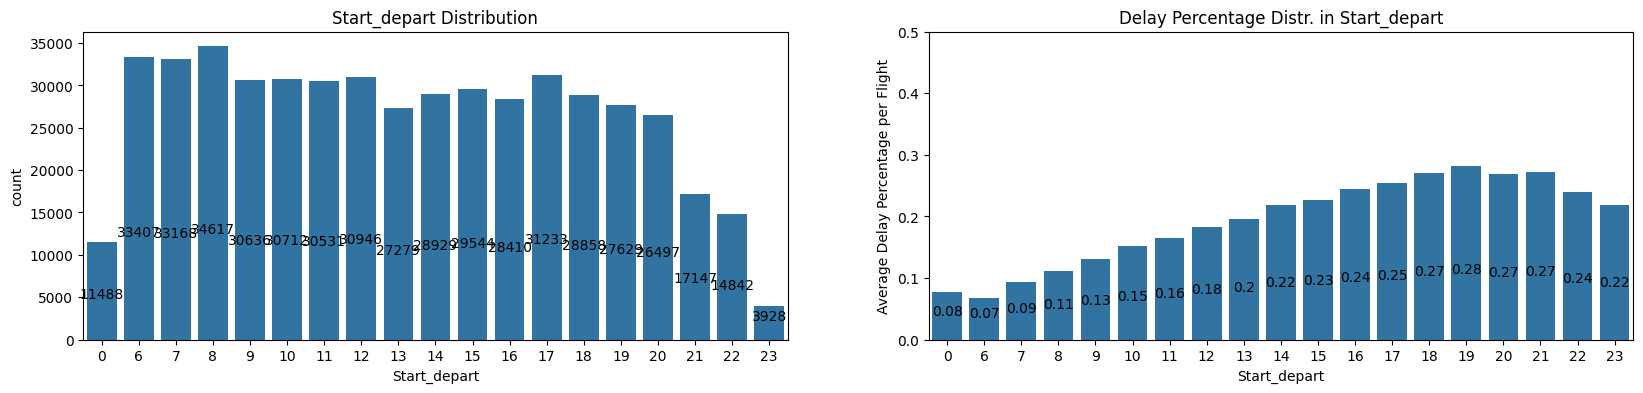

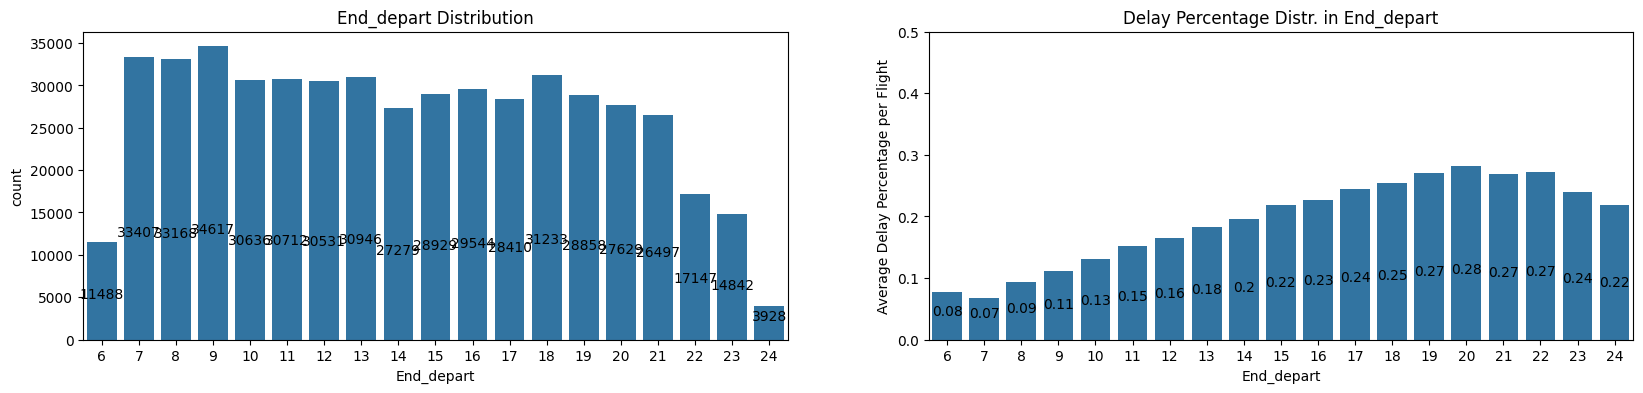

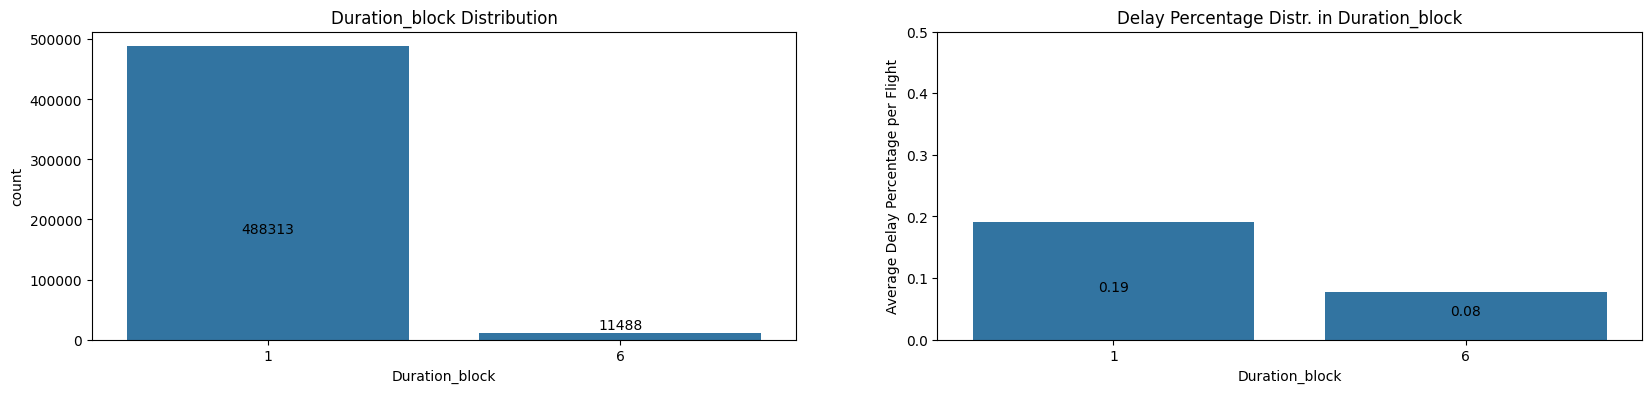

In [322]:
# Visualize Distributions of Categorical Variables
new_features = ['START_DEPART', 'END_DEPART', 'DURATION_BLOCK']

for column in new_features:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,4))

    # Figure #1: Bar Chart of the Categorical Feature Counts
    sns.countplot(x=column, data=df, ax=axes[0])
    axes[0].set_xlabel(column.capitalize())
    axes[0].set_title(f"{column.capitalize()} Distribution")
    add_labels(axes, 0)

    # Compute the percentage of 1s in the binary variable for each category
    category_percent = df.groupby(column)['DEP_DEL15'].mean()
    
    # Figure #2: Bar Chart of the Categrocial Feature vs Delay Percentage
    sns.barplot(x=category_percent.index, y=category_percent.values, ax=axes[1])
    axes[1].set_xlabel(column.capitalize())
    axes[1].set_ylabel("Average Delay Percentage per Flight")
    axes[1].set_ylim(0, 0.5)
    axes[1].set_title(f"Delay Percentage Distr. in {column.capitalize()}")
    add_labels(axes, 1)

plt.show()

Takeaways from Above
- `START_DEPART` and `END_DEPART` have very similar distributions since most
departure blocks have 1 hour durations. This means `END_DEPART` isn't really 
unneccessary.
  - Both show that delay percentages rise the later the departure block period in the 
  day. 
- There is a severe data imbalance in duration block towards the 1-hour durations
than the 6-hours.
- The 6-hour duration blocks have much lower delay percentages than 1-hour duration.

In [323]:
# Remove END_DEPART and view updated data
df.drop(columns=['END_DEPART'])
test_df.drop(columns=['END_DEPART'])
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,START_DEPART,END_DEPART,DURATION_BLOCK
0,12,4,0,2,2,43,50,SkyWest Airlines Inc.,15165,70473,1304,1690031,3472966,0.000034,0.000099,14,Houston Intercontinental,29.983,-95.340,Eppley Airfield,0.28,0.0,0.0,85.0,5.37,0.202513,0.164248,0.181618,0.155223,9,10,1
1,3,3,0,1,4,59,76,Endeavor Air Inc.,33799,22191,3137,4365661,1212846,0.000000,0.000094,11,Atlanta Municipal,33.641,-84.427,Gulfport-Biloxi International,0.00,0.0,0.0,63.0,5.59,0.155571,0.187867,0.151269,0.179698,12,13,1
2,2,1,0,2,1,23,143,Southwest Airlines Co.,10780,94922,3110,1823051,13382999,0.000062,0.000099,16,Orlando International,28.432,-81.325,NONE,0.00,0.0,0.0,70.0,5.82,0.258887,0.187867,0.229539,0.259786,14,15,1
3,4,2,0,1,2,39,50,American Eagle Airlines Inc.,26142,25138,5184,3103410,1204766,0.000348,0.000107,14,Chicago O'Hare International,41.978,-87.906,McGhee Tyson,0.00,0.0,0.0,73.0,10.29,0.148148,0.188167,0.138603,0.135374,9,10,1
4,10,5,1,4,3,16,200,JetBlue Airways,11393,24795,1631,1823051,3190369,0.000160,0.000127,1,Orlando International,28.432,-81.325,John F. Kennedy International,0.00,0.0,0.0,89.0,9.40,0.198369,0.127255,0.193713,0.223513,21,22,1


We should also remove average passengers in the departing airport and airline 
per month (`AVG_MONTHLY_PASS_AIRPORT` and `AVG_MONTHLY_PASS_AIRLINE`) from the 
dataset as they are highly correlated with the average flights in the departing 
airport and airline per month `AIRPORT_FLIGHTS_MONTH` and `AIRLINE_FLIGHTS_MONTH`
respectively. 

We can also remove `DEPARTING_AIRPORT`, `PREVIOUS_AIRPORT`, and `CARRIER_NAME`, 
as the cardinality for those categorical values are too high to encode. Also,
there are metrics that tell more useful information about the airport or airline
, rather than the name, such as the historical delay percentage and average 
passengers per month.

In [324]:
df.drop(columns=['AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE',
                'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', 'CARRIER_NAME'],
        inplace=True)
test_df.drop(columns=['AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE',
                'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', 'CARRIER_NAME'],
        inplace=True)

### Feature Scaling

The scales of each feature varies quite a bit in this dataset. 
`FLT_ATTENDANTS_PER_PASS` and `GROUND_SERV_PER_PASS` have extremely low values 
(All less than 0.001) while `AIRLINE_FLIGHTS_MONTH` have extremely high values
(All greater than 10 thousand).
This could pose a problem when training a model, as it causes bias to put higher
weights for higher scales and lower weights for lower scales. To fix that, I 
will use standardization on the entire dataset.

In [325]:
# Initialize the scaler
scaler = StandardScaler()

In [326]:
# Fit and Transform All Numeric Features
columns_to_scale = df.columns.difference(
    ['MONTH', 'DAY_OF_WEEK', 'DISTANCE_GROUP', 'DEP_TIME_BLK', 'SEGMENT_NUMBER',
     'DEP_DEL15', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT',
     'START_DEPART', 'END_DEPART', 'DURATION_BLOCK'])
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
test_df[columns_to_scale] = scaler.fit_transform(test_df[columns_to_scale])

df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND,CARRIER_HISTORICAL,DEP_AIRPORT_HIST,DAY_HISTORICAL,DEP_BLOCK_HIST,START_DEPART,END_DEPART,DURATION_BLOCK
0,12,4,0,2,2,0.702236,-1.796165,0.279815,0.223020,-0.506225,-0.731140,-0.785771,0.356369,-1.222354,-0.062344,0.516036,-0.101638,-0.125959,0.736738,-0.822678,0.282034,-0.567562,-0.197575,-0.436756,9,10,1
1,3,3,0,1,4,1.444928,-1.237715,2.386339,-1.181360,-0.075624,-1.126050,-0.903794,-0.075818,-0.557333,0.547489,-0.303378,-0.101638,-0.125959,-0.460085,-0.761717,-0.707002,0.000432,-0.990649,-0.121491,12,13,1
2,2,1,0,2,1,-0.226130,0.201369,-0.215898,0.934169,-0.081967,-0.412492,-0.788107,0.644493,-1.504325,0.720833,-0.303378,-0.101638,-0.125959,-0.079278,-0.697984,1.469829,0.000432,1.054699,0.910148,14,15,1
3,4,2,0,1,2,0.516563,-1.796165,1.520735,-1.095641,0.405250,2.897896,-0.616705,0.356369,0.958325,0.353078,-0.303378,-0.101638,-0.125959,0.083925,0.540639,-0.863404,0.007635,-1.321630,-0.692440,9,10,1
4,10,5,1,4,3,-0.551058,1.425663,-0.146600,-1.105617,-0.429408,0.722325,-0.186771,-1.516439,-1.504325,0.720833,-0.303378,-0.101638,-0.125959,0.954342,0.294023,0.194732,-1.457156,0.118511,0.442910,21,22,1


### Dealing with Data Imbalance

Only 19% of this dataset contain delayed flights. To address this issue, I
will apply SMOTE to synthetically produce delayed flight data.

## Training and Testing Models

The goal of this section is to find what type of model performs the best in
predicting whether a flight is delayed based on various features about the 
flight, airport, airline, weather, etc. Let's first split up the features and
target variable.

In [327]:
# Seperate features and target variable
X_train = df.drop('DEP_DEL15', axis=1)
y_train = df['DEP_DEL15']
X_test = test_df.drop('DEP_DEL15', axis=1)
y_test = test_df['DEP_DEL15']

## Logistic Regression
The first type of model I am testing is Logistic Regression. For the 
assumptions, each flight's data isn't independent to other flights, as one delay
could lead to future delays. However, we randomly sampled 500 thousand flights
out of 4 million to mitigate this problem as much as possible. We removed 
variables that are highly correlated to each other, avoiding multicollinearity. 

The assumptions are met so let's see how this type of model performs.

In [328]:
# Initialize and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.81276


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
